<a href="https://colab.research.google.com/github/mcnica89/DATA6100_F23/blob/main/Regression/MultipleRegressions_ScrapWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf # R-style formula api

In [2]:
#Secret data generation!!
def secret_data(N):
  secret_class = np.concatenate([np.ones(N//2),2*np.ones(N//2)])
  X_1 = 10*np.random.rand(N)
  secret_class = (X_1 + np.random.randn(N) > 5)
  X_2 = secret_class + 0.1*np.random.randn(N)
  Y = 10*secret_class - X_1 + np.random.randn(N)
  return X_1,X_2,Y

N = 100
X_1,X_2,Y = secret_data(N)

Text(0, 0.5, 'Y')

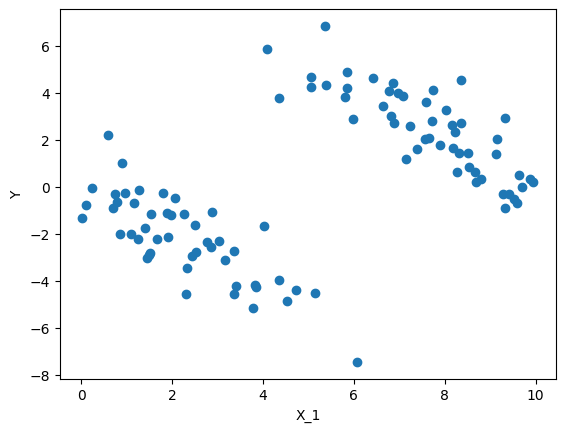

In [3]:
plt.plot(X_1,Y,'o')
plt.xlabel('X_1')
plt.ylabel('Y')

#Multiple Linear Regression

In [4]:
df = pd.DataFrame({'X_1':X_1,'X_2':X_2,'Y':Y})
df

,X_1,X_2,Y
0,9.878915,1.075964,0.316633
1,1.527687,0.014931,-1.141683
2,5.813281,1.067513,3.813107
3,0.958502,-0.114259,-0.254738
4,9.531824,0.810621,-0.516636
...,...,...,...
95,9.119567,0.819108,1.405222
96,1.498411,-0.017334,-2.880918
97,7.388510,0.987520,1.608077
98,7.136910,1.024371,1.194950


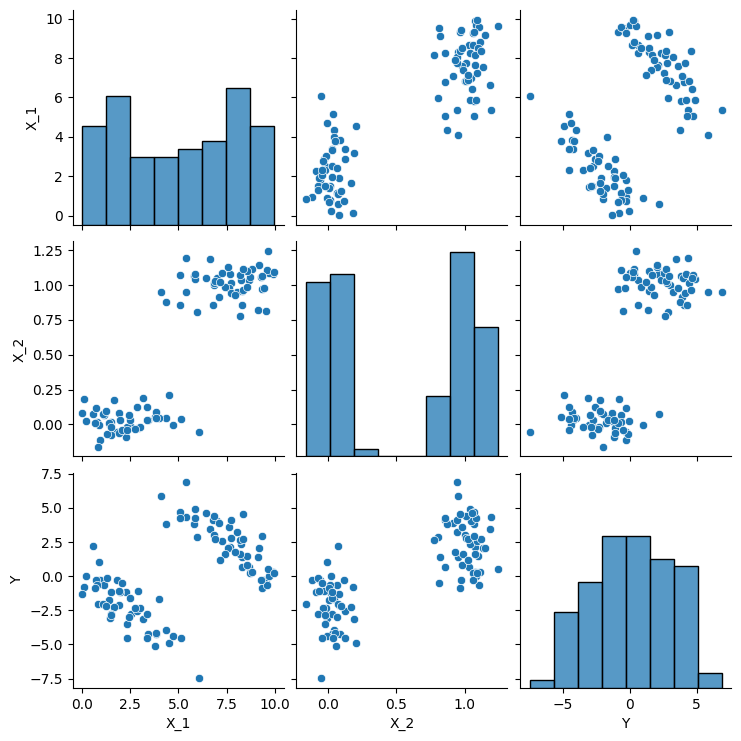

In [5]:
sns.pairplot(df, vars=['X_1', 'X_2', 'Y']);

# Y vs X_1

In [6]:
# ols model with intercept
Y_and_X_1_model = smf.ols(formula='Y ~ X_1', data=df)

# fitted model and summary
Y_and_X_1_fit = Y_and_X_1_model.fit()
print(Y_and_X_1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     26.22
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           1.52e-06
Time:                        00:55:48   Log-Likelihood:                -237.84
No. Observations:                 100   AIC:                             479.7
Df Residuals:                      98   BIC:                             484.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0606      0.511     -4.032      0.0

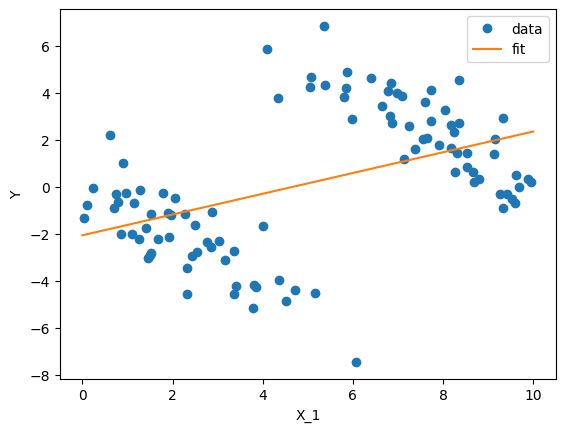

In [7]:
X1_axis = np.linspace(0,10,100)
Y_pred = Y_and_X_1_fit.predict(pd.DataFrame({'X_1':X1_axis}))
plt.plot(X_1,Y,'o',label='data')
plt.plot(X1_axis,Y_pred,'-',label='fit')
plt.xlabel("X_1")
plt.ylabel("Y")
plt.legend()

# Y vs X_2

In [8]:
# ols model with intercept
Y_and_X_2_model = smf.ols(formula='Y ~ X_2', data=df)

# fitted model and summary
Y_and_X_2_fit = Y_and_X_2_model.fit()
print(Y_and_X_2_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     134.7
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           4.19e-20
Time:                        00:55:49   Log-Likelihood:                -206.46
No. Observations:                 100   AIC:                             416.9
Df Residuals:                      98   BIC:                             422.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2277      0.283     -7.865      0.0

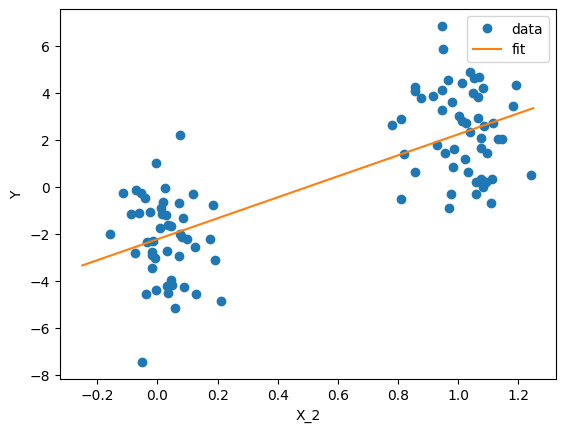

In [9]:
X2_axis = np.linspace(-0.25,1.25,100)
Y_pred = Y_and_X_2_fit.predict(pd.DataFrame({'X_2':X2_axis}))
plt.plot(X_2,Y,'o',label='data')
plt.plot(X2_axis,Y_pred,'-',label='fit')
plt.xlabel("X_2")
plt.ylabel("Y")
plt.legend()

# Y vs X_1 and X_2

In [10]:
# ols model with intercept
Y_and_all_X_model = smf.ols(formula='Y ~ X_1 + X_2', data=df)

# fitted model and summary
Y_and_all_X_results = Y_and_all_X_model.fit()
print(Y_and_all_X_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     161.3
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           1.43e-31
Time:                        00:55:51   Log-Likelihood:                -176.47
No. Observations:                 100   AIC:                             358.9
Df Residuals:                      97   BIC:                             366.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3154      0.301     -1.049      0.2

       X_1       X_2
0      0.0 -0.250000
1      0.0 -0.234848
2      0.0 -0.219697
3      0.0 -0.204545
4      0.0 -0.189394
...    ...       ...
9995  10.0  1.189394
9996  10.0  1.204545
9997  10.0  1.219697
9998  10.0  1.234848
9999  10.0  1.250000

[10000 rows x 2 columns]
0      -2.605446
1      -2.466654
2      -2.327862
3      -2.189070
4      -2.050278
          ...   
9995    1.814451
9996    1.953243
9997    2.092035
9998    2.230827
9999    2.369619
Length: 10000, dtype: float64


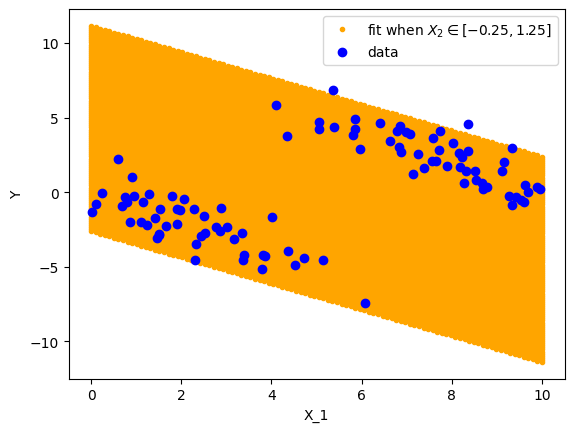

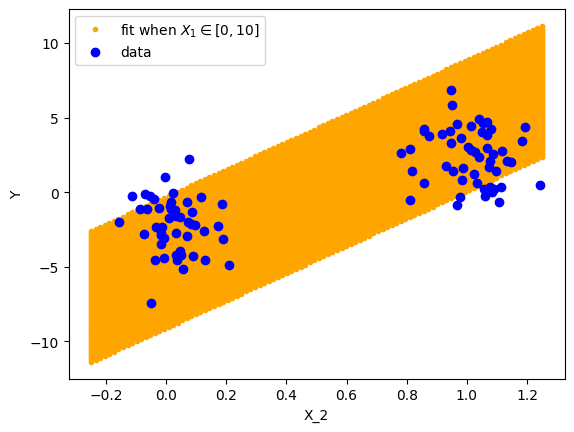

In [11]:
X1_axis = np.linspace(0,10,100)
df_X1_axis = pd.DataFrame({'X_1':X1_axis})
X2_axis = np.linspace(-0.25,1.25,100)
df_X2_axis = pd.DataFrame({'X_2':X2_axis})
df_both = df_X1_axis.merge(df_X2_axis, how='cross')
print(df_both)

Y_pred = Y_and_all_X_results.predict(df_both)
print(Y_pred)

for X_data,X_label in [ (X_1,'X_1'), (X_2,'X_2')  ]:
  if X_label == 'X_1':
    plt.plot(df_both[X_label],Y_pred,'.',c='orange',label= r'fit when $X_2 \in [-0.25, 1.25]$')
  if X_label == 'X_2':
    plt.plot(df_both[X_label],Y_pred,'.',c='orange',label= r'fit when $X_1 \in [0, 10]$')

  plt.plot(X_data,Y,'o',c='b',label='data')
  plt.xlabel(X_label)
  plt.ylabel("Y")
  plt.legend()
  plt.show()

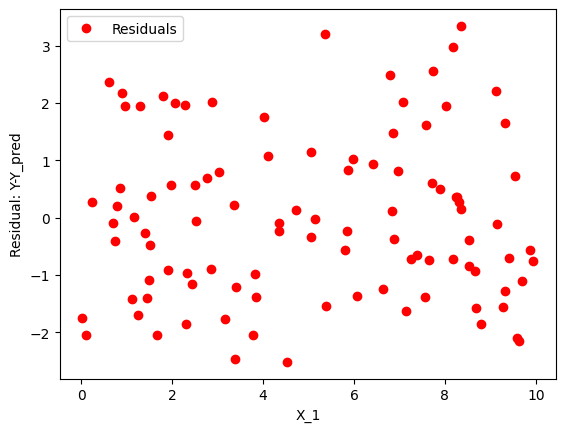

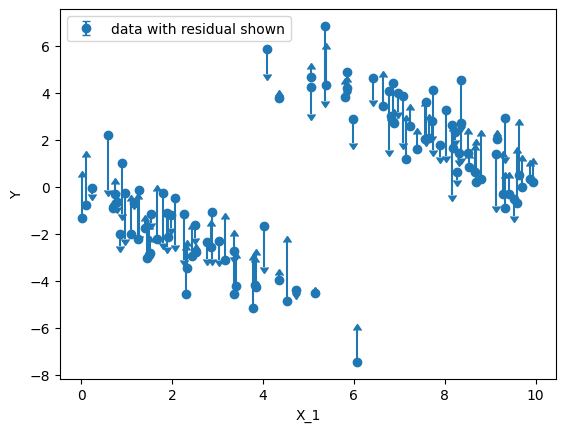

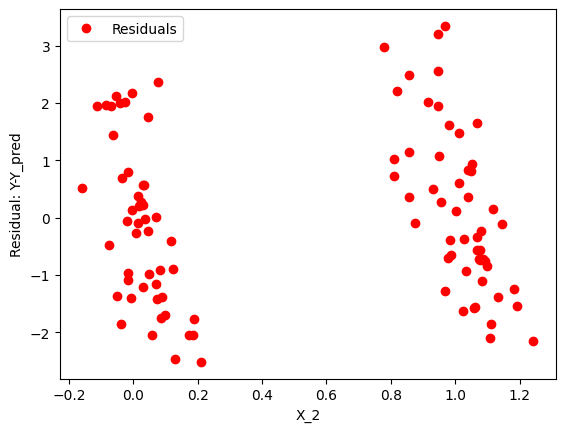

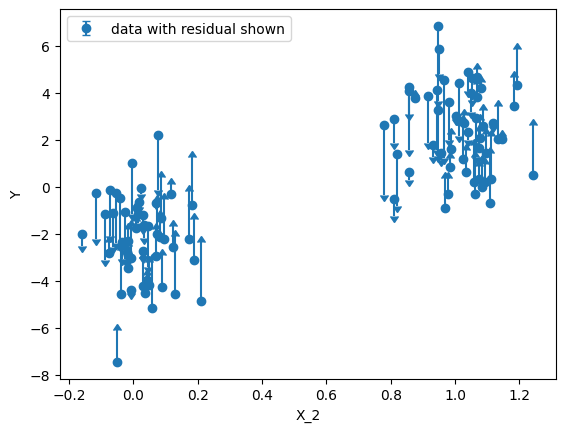

In [12]:
Y_pred = Y_and_all_X_results.predict(df)
Residuals = Y-Y_pred
Overestimate = np.array(Residuals > 0)
Underestimate = np.array(Residuals < 0)
for X_data,X_label in [ (X_1,'X_1'), (X_2,'X_2')  ]:
  plt.plot(X_data,Residuals,'ro',label='Residuals')
  plt.xlabel(X_label)
  plt.ylabel("Residual: Y-Y_pred")
  plt.legend()
  plt.show()

  plt.errorbar(X_data,Y,fmt='o',yerr=np.abs(Residuals),lolims=Underestimate,uplims = Overestimate,label='data with residual shown')
  plt.xlabel(X_label)
  plt.ylabel("Y")
  plt.legend()
  plt.show()

# Adding a feature!

In [13]:
X_3 = (X_2 > 0.5)
df['X_3'] = X_3

# ols model with intercept
Y_and_all_X_model = smf.ols(formula='Y ~ X_1 + X_2 + X_3', data=df)

# fitted model and summary
Y_and_all_X_results = Y_and_all_X_model.fit()
print(Y_and_all_X_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     212.4
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           3.05e-42
Time:                        00:55:58   Log-Likelihood:                -148.04
No. Observations:                 100   AIC:                             304.1
Df Residuals:                      96   BIC:                             314.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0745      0.232      0.321      

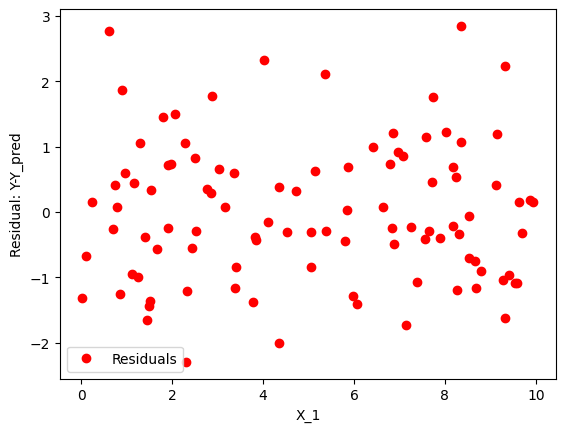

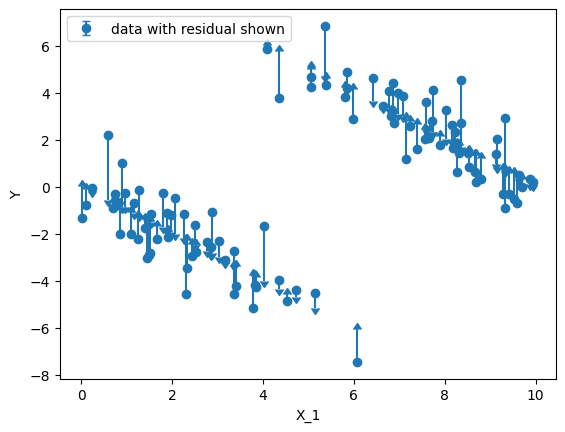

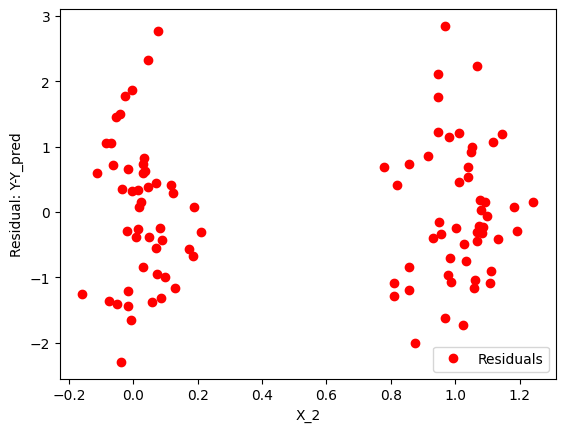

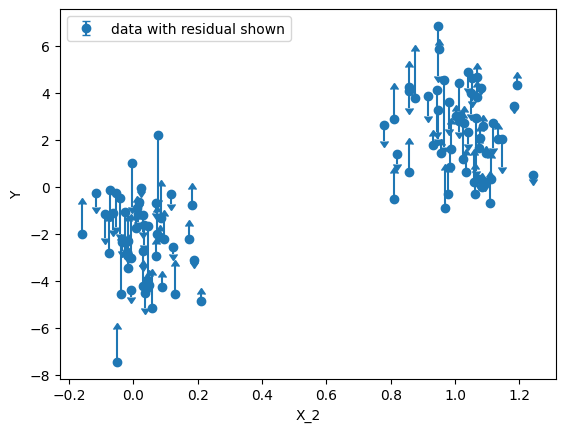

In [14]:
Y_pred = Y_and_all_X_results.predict(df)
Residuals = Y-Y_pred
Overestimate = np.array(Residuals > 0)
Underestimate = np.array(Residuals < 0)
for X_data,X_label in [ (X_1,'X_1'), (X_2,'X_2')  ]:
  plt.plot(X_data,Residuals,'ro',label='Residuals')
  plt.xlabel(X_label)
  plt.ylabel("Residual: Y-Y_pred")
  plt.legend()
  plt.show()

  plt.errorbar(X_data,Y,fmt='o',yerr=np.abs(Residuals),lolims=Underestimate,uplims = Overestimate,label='data with residual shown')
  plt.xlabel(X_label)
  plt.ylabel("Y")
  plt.legend()
  plt.show()